In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [5]:
cd ..


C:\Users\ASUS


In [6]:
df=pd.read_csv('heart.csv')

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.info()#To check if there is any null value in dataset or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


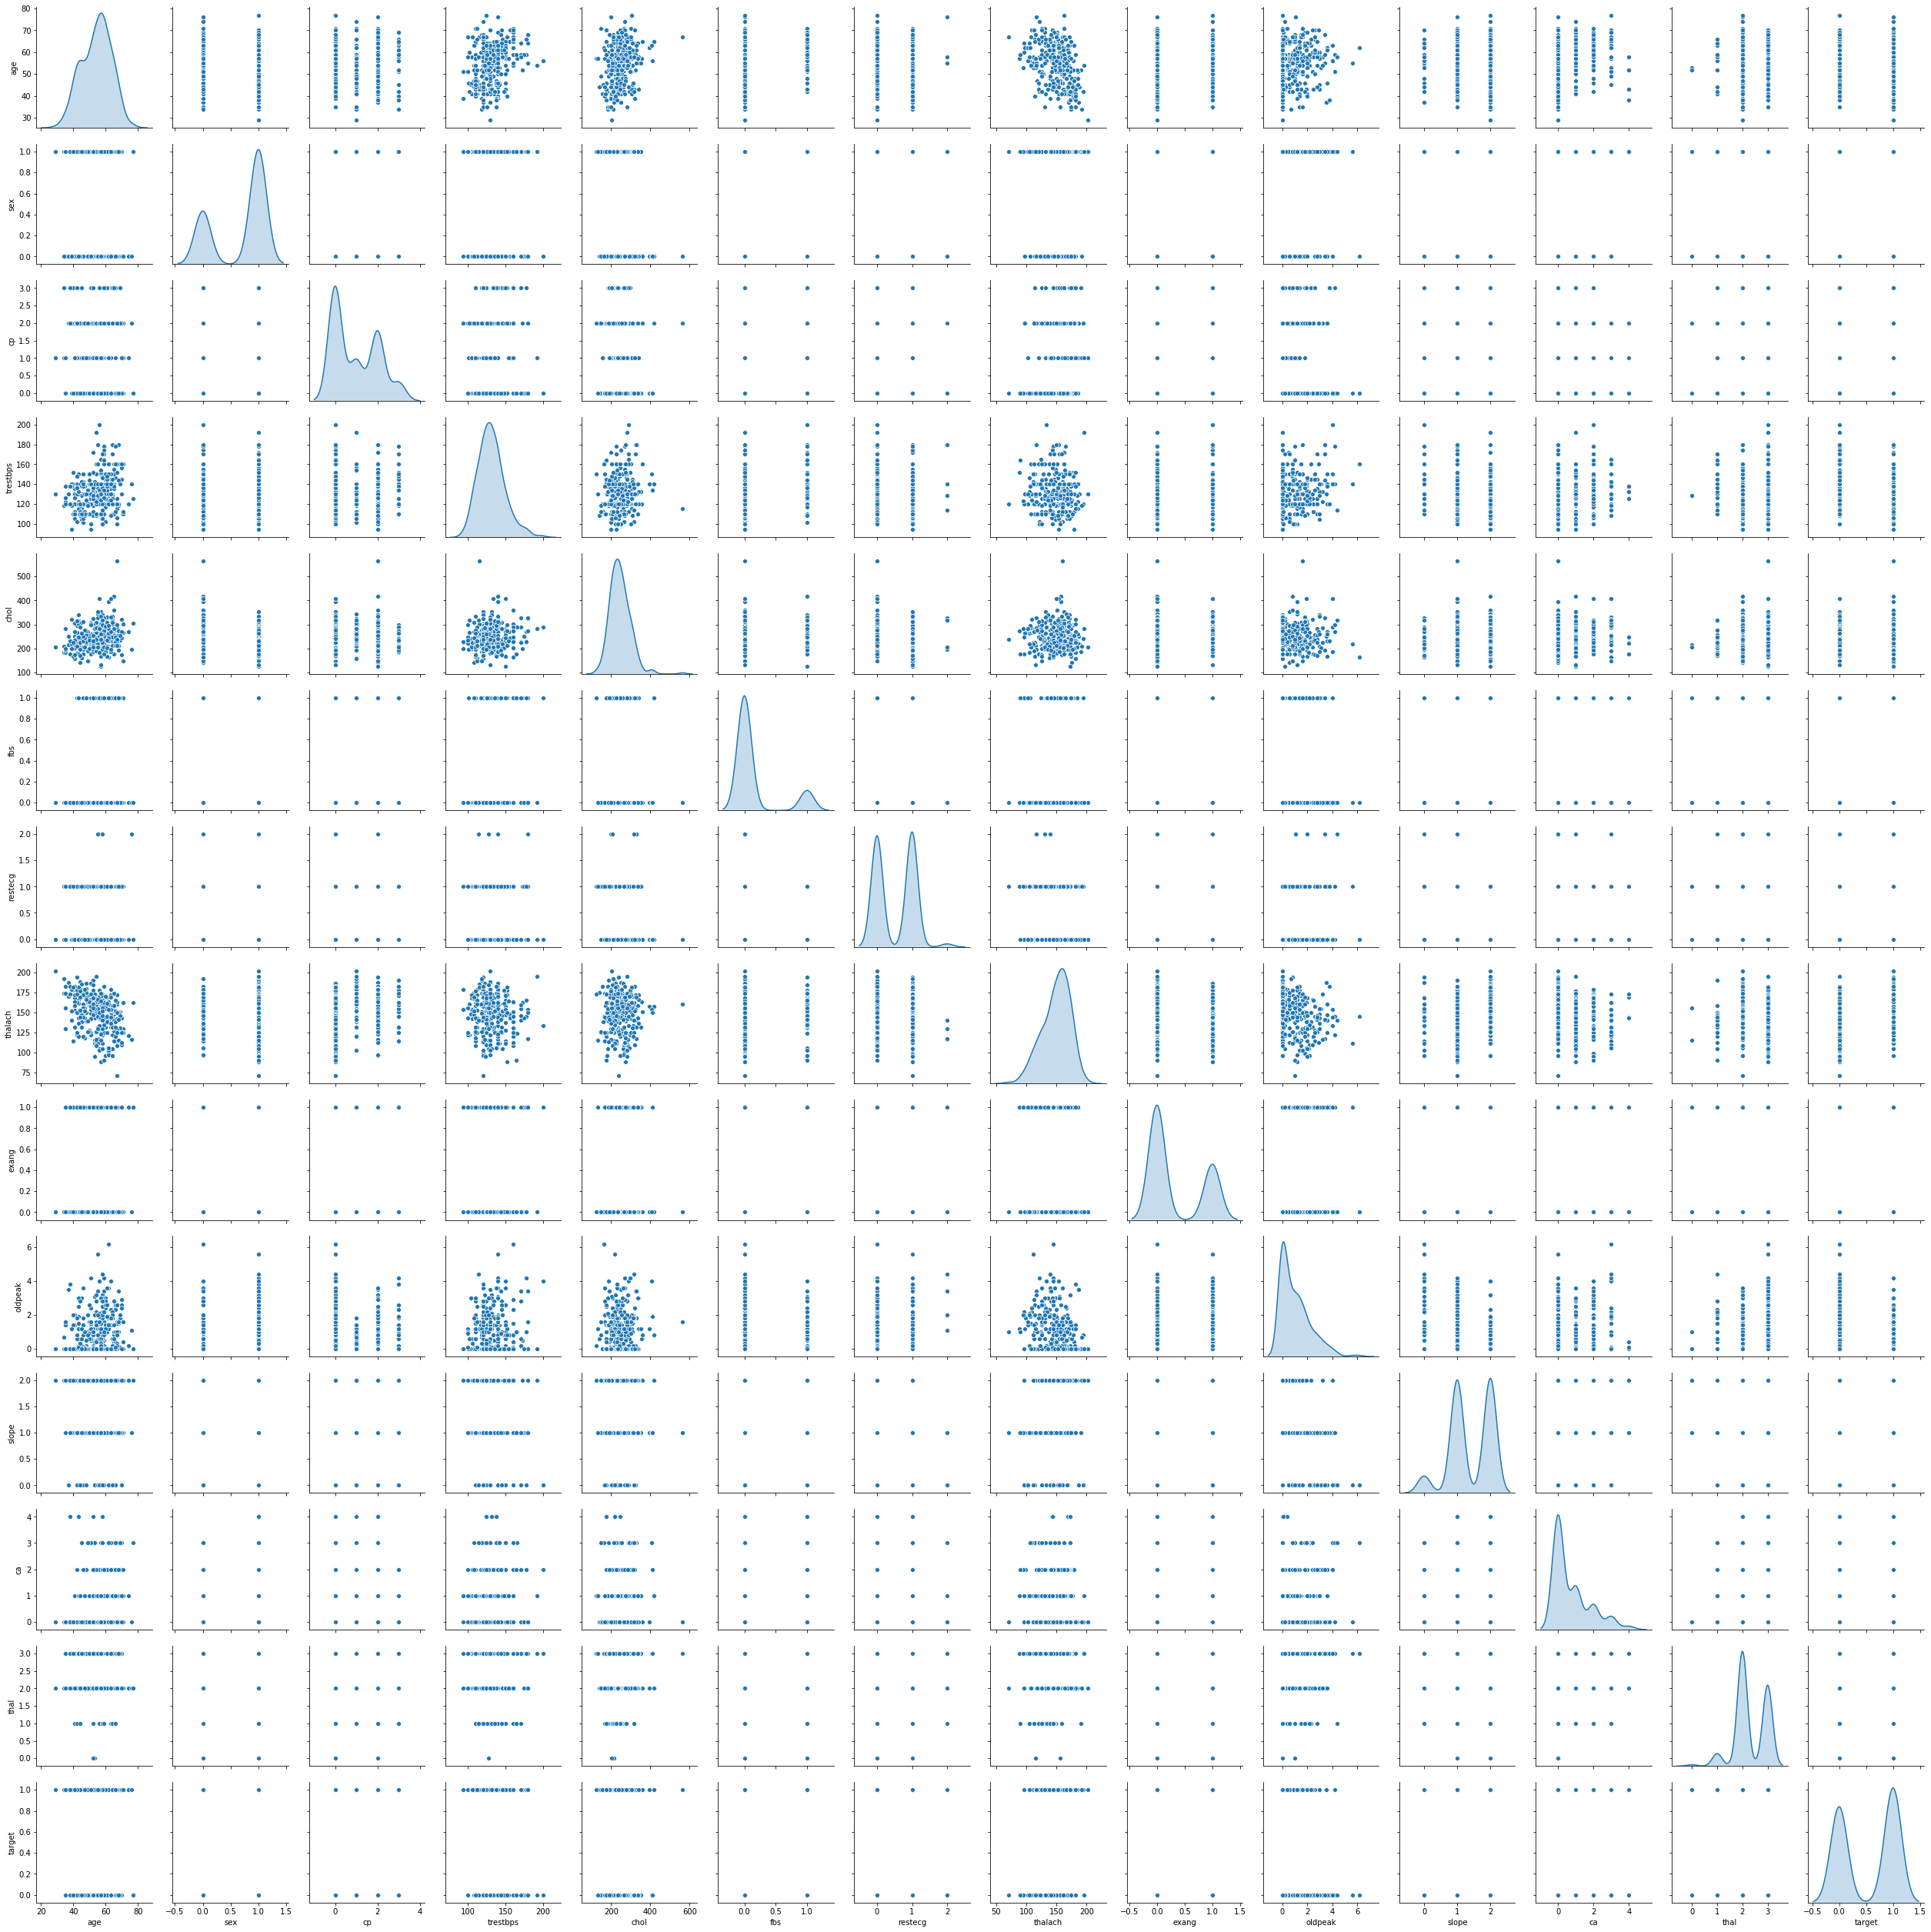

In [10]:
sns.pairplot(df,diag_kind='kde')

In [11]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

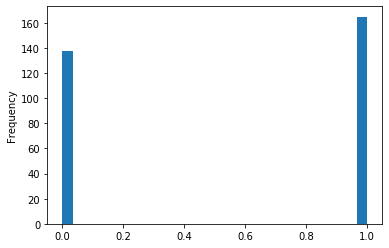

In [12]:
df['target'].plot.hist(bins=30)#To check no of patient with heart disease in original dataset

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)

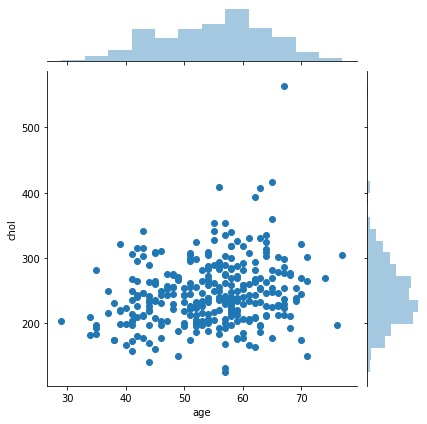

In [15]:
sns.jointplot(x='age',y='chol',data=df)#We can see that mostly cholestrol increase after age of 50

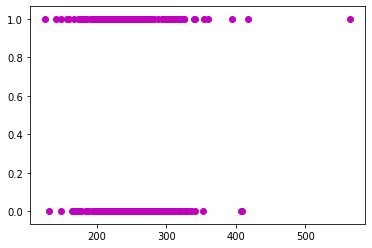

In [16]:
plt.scatter(x['chol'],y['target'],marker='o',color='m')

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train.values.ravel())#Here we are using y_train.values.ravel() instead of y_train to remove  error related to column vector

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
y_pred=classifier.predict(x_test)

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [21]:
from sklearn.metrics import accuracy_score
result=accuracy_score(y_test,y_pred)
print("Accuracy:",result)

Accuracy: 0.9016393442622951


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[26,  3],
       [ 3, 29]], dtype=int64)

In [23]:
#Now we will  use  k fold cross validation to imporve  algo:

In [24]:
from sklearn import metrics

In [25]:
for i in range(1,30):
    classifier= KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    classifier.fit(x_train,y_train.values.ravel())
    pred=classifier.predict(x_test)
    w=metrics.accuracy_score(pred,y_test)
    print('No.of neighbours'+" "+str(i) )
    print('Accuracy_score'+" "+str(w))
#We cleary see around at 5 and 8 we are getting maximum accuracy of our K_Nearest_Neighbours    

No.of neighbours 1
Accuracy_score 0.819672131147541
No.of neighbours 2
Accuracy_score 0.8524590163934426
No.of neighbours 3
Accuracy_score 0.8688524590163934
No.of neighbours 4
Accuracy_score 0.8688524590163934
No.of neighbours 5
Accuracy_score 0.9016393442622951
No.of neighbours 6
Accuracy_score 0.9016393442622951
No.of neighbours 7
Accuracy_score 0.8688524590163934
No.of neighbours 8
Accuracy_score 0.9016393442622951
No.of neighbours 9
Accuracy_score 0.8852459016393442
No.of neighbours 10
Accuracy_score 0.8688524590163934
No.of neighbours 11
Accuracy_score 0.8852459016393442
No.of neighbours 12
Accuracy_score 0.8852459016393442
No.of neighbours 13
Accuracy_score 0.8852459016393442
No.of neighbours 14
Accuracy_score 0.8852459016393442
No.of neighbours 15
Accuracy_score 0.8852459016393442
No.of neighbours 16
Accuracy_score 0.8852459016393442
No.of neighbours 17
Accuracy_score 0.8688524590163934
No.of neighbours 18
Accuracy_score 0.8688524590163934
No.of neighbours 19
Accuracy_score 0.8

0.9014008620689655


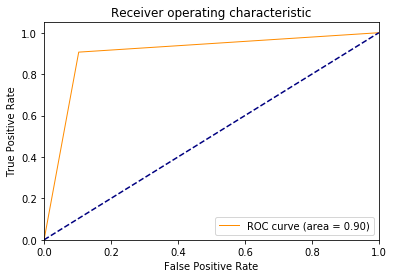

In [26]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)
print(roc_auc_score(y_test,y_pred))
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()#The area covered by the curve is the area between the orange line (ROC) and the axis. This area covered is AUC. The bigger the area covered, the better the machine learning models is at distinguishing the given classes. Ideal value for AUC is 1.